<a href="https://colab.research.google.com/github/nahuelalmeira/redesNeuronales/blob/master/practico1/Practico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importamos paquetes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import solve_ivp
from numpy.fft import fft, fftfreq

%matplotlib inline


## Parámetros para graficar
sns.set_style('darkgrid')
sns.set_context('talk')

BLUE = '#1f77b4'
ORANGE = '#ff7f0e'
GREEN = '#2ca02c'
a = 1

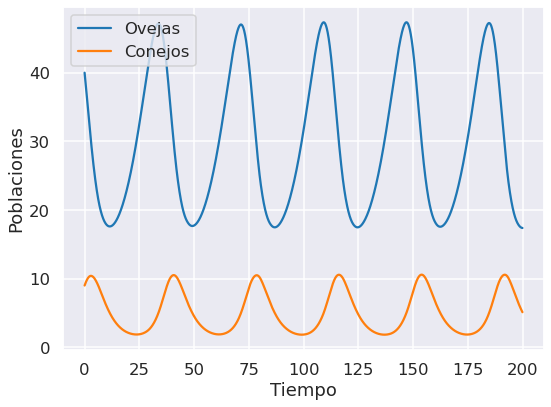

In [ ]:
def FoxesVsRabbits(t, y, *args):
    """
    Sistema de tipo Lokta-Volterra, con interacción de dos
    especies competidoras: conejos (r) y ovejas (s).
    """
    c, z = y
    alpha, beta, gamma, delta = args

    dcdt = alpha*c - beta*c*z
    dzdt = -gamma*z + delta*c*z

    dydt = (dcdt, dzdt)

    return dydt

alpha = 0.1
beta  = 0.02
gamma = 0.3
delta = 0.01
args = (alpha, beta, gamma, delta)

## Parámetros de integración
t0 = 0
tf = 200
t_span = (t0, tf)
t_eval = np.arange(t0, tf, 0.05)

## Definimos condicion inicial e integramos
y0 = (40, 9)
sol = solve_ivp(FoxesVsRabbits, t_span=t_span, y0=y0, t_eval=t_eval, args=args)

## Graficamos las soluciones
ncols = 1
nrows = 1
fig, ax = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax.set_ylabel('Poblaciones')
ax.set_xlabel('Tiempo')
ax.plot(sol.t, sol.y[0], label='Ovejas')
ax.plot(sol.t, sol.y[1], label='Conejos')
ax.legend()

plt.tight_layout()
plt.show()

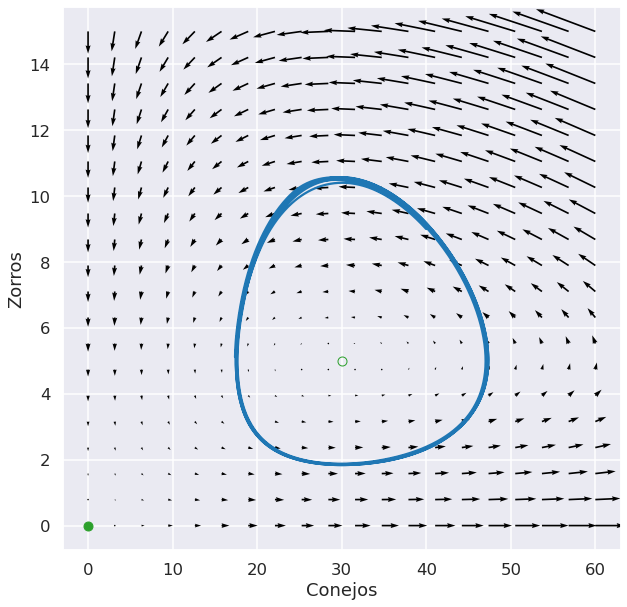

In [ ]:
## Parámetros de integración
t0 = 0
tf = 200
t_span = (t0, tf)
t_eval = np.arange(t0, tf, 0.05)

## Resolvemos el sistema para distintas condiciones iniciales,
## para las cuales graficaremos las trayectorias

soluciones = []
for i, y0 in enumerate(condiciones_iniciales):
    sol = solve_ivp(FoxesVsRabbits, t_span=t_span, y0=y0, t_eval=t_eval, args=args)
    soluciones.append(sol)

## Creamos una grilla en el espacio de fases,
## representada por las variables R y S
r_values = np.linspace(0,60,20)
s_values = np.linspace(0,15,20)
R, S = np.meshgrid(r_values, s_values)

## En cada punto de la grilla graficamos una flecha. Las variables
## U y V representan las coordenadas de las flechas 
U, V = FoxesVsRabbits(None, [R, S], *args)

## Realizamos el gráfico
fig, ax = plt.subplots(figsize=(10,10))
#ax.set_xlim(-0.05,3.05)
#ax.set_ylim(-0.05,2.05)
ax.set_ylabel('Zorros')
ax.set_xlabel('Conejos')

## Graficamos el campo de pendientes
ax.quiver(R, S, U, V)

## Punto fijo intestable
ax.plot(gamma/delta, alpha/beta, 'o', fillstyle='none', color=GREEN)

## Punto fijo estable
ax.plot(0, 0, 'o', color=GREEN)

## Graficamos trayectorias
for i, y0 in enumerate(condiciones_iniciales):
    sol = soluciones[i]
    ax.plot(sol.y[0], sol.y[1], color=BLUE)

plt.show()

In [ ]:
## Parámetros de integración
h = 0.05
t0 = 0
tf = h*2**13
t_span = (t0, tf)
t_eval = np.arange(t0, tf, h)
n = t_eval.shape[0]
print('Tf = {}'.format(tf), np.log2(n))

## Definimos condicion inicial e integramos
y0 = (40, 9)
sol = solve_ivp(FoxesVsRabbits, t_span=t_span, y0=y0, t_eval=t_eval, args=args)

Tf = 81.92 13.0


0.01220703125 81.92 514.7185403641517


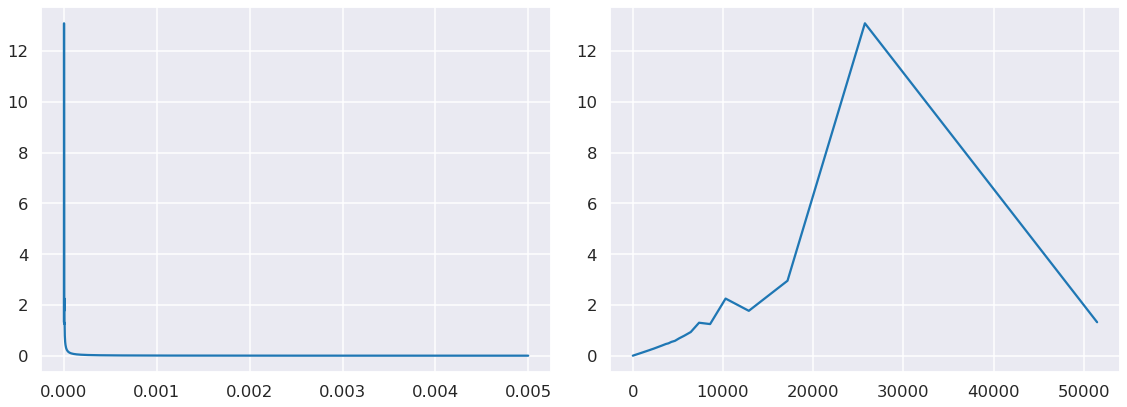

In [ ]:
freqs = fftfreq(n)
mask = freqs > 0
fft_vals = fft(sol.y[0])
fft_theo = 2*np.abs(fft_vals/n)

freq_max = freqs[np.argmax(fft_theo[mask])]
print(freq_max/h, h/freq_max, 2*np.pi*h/(freq_max))

ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
#ax.set_xlim(0, 0.01)
ax.plot(freqs[mask]*h, fft_theo[mask])

ax = axes[1]
#ax.set_xlim(0, 10000)
ax.plot(2*np.pi/freqs[mask], fft_theo[mask])

plt.tight_layout()
plt.show()

In [ ]:
fft_theo

array([59.81618722,  0.17288029,  0.14374274, ...,  0.14124545,
        0.14374274,  0.17288029])

(0.0, 100.0)

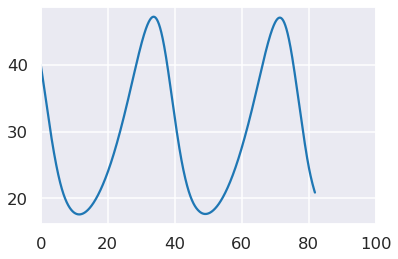

In [ ]:
plt.plot(sol.t, sol.y[0])
plt.xlim(0, 100)